In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.read_csv("/content/Mall_Customers.csv")

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

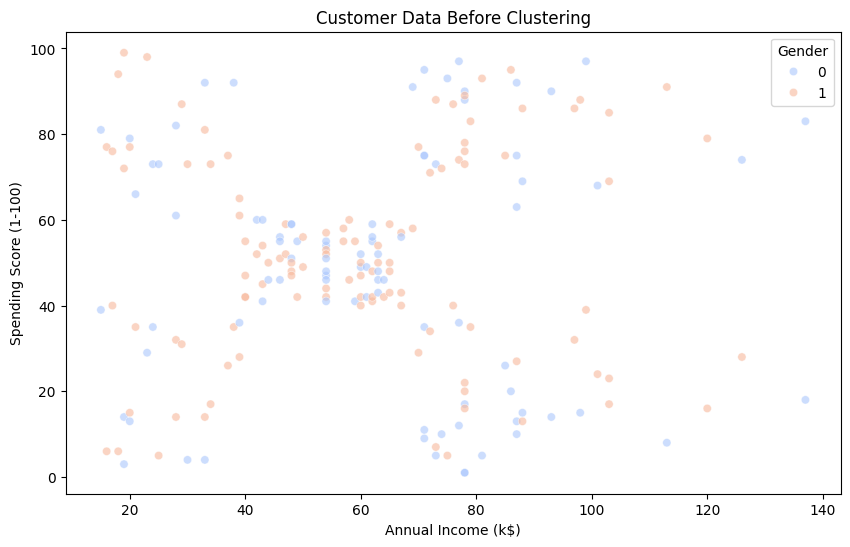

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='coolwarm', alpha=0.6)
plt.title('Customer Data Before Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender', loc='upper right')
plt.show()

In [8]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

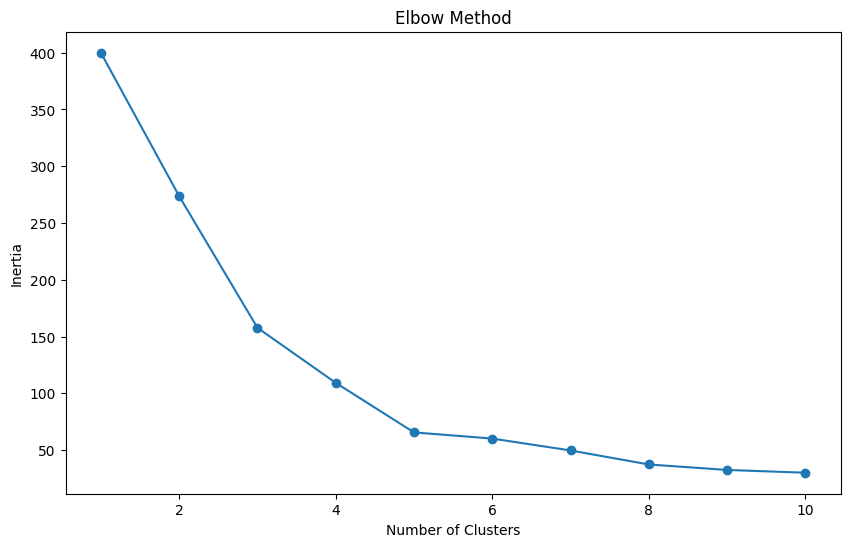

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [10]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

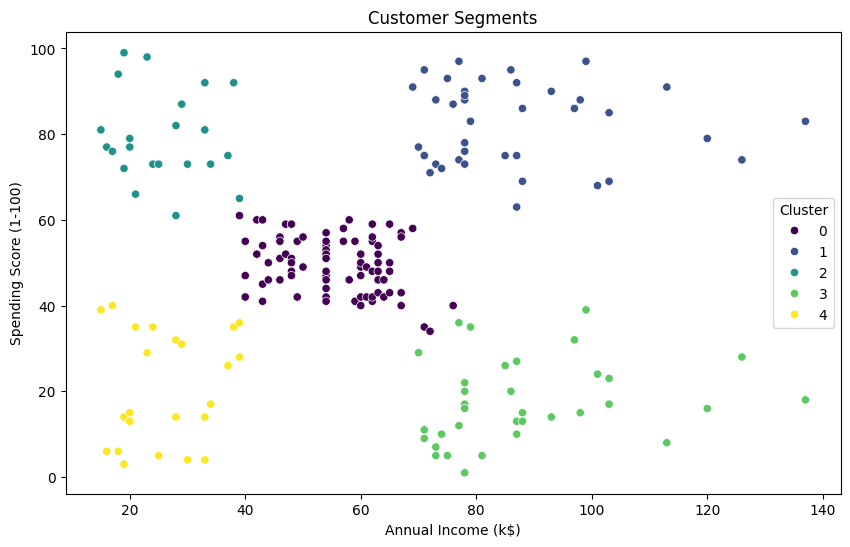

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.show()

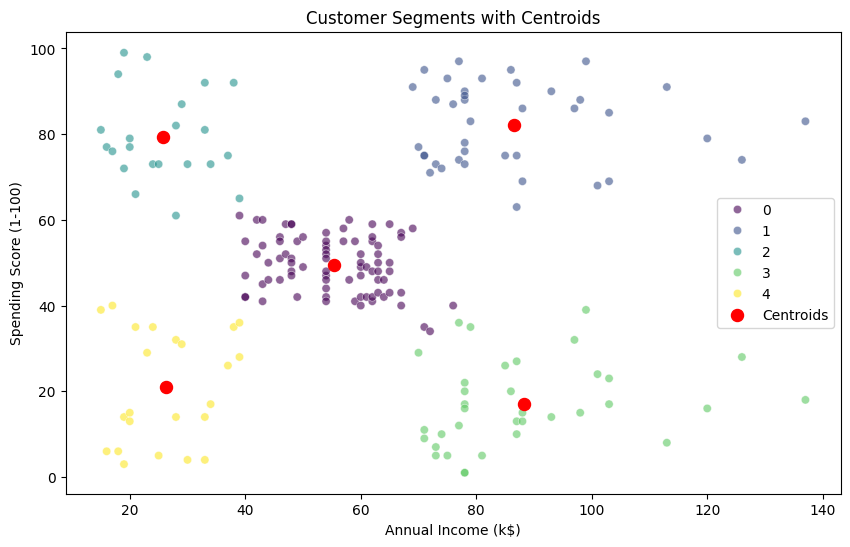

In [12]:
centroids = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', alpha=0.6)
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], s=300, c='red', marker='.', label='Centroids')
plt.title('Customer Segments with Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [13]:
cluster_summary = data.groupby('Cluster').agg({
    'Age': ['mean', 'median', 'count'],
    'Annual Income (k$)': ['mean', 'median'],
    'Spending Score (1-100)': ['mean', 'median']
}).reset_index()

cluster_summary.columns = ['Cluster', 'Age Mean', 'Age Median', 'Count', 'Income Mean', 'Income Median', 'Spending Mean', 'Spending Median']
print(cluster_summary)

   Cluster   Age Mean  Age Median  Count  Income Mean  Income Median  \
0        0  42.716049        46.0     81    55.296296           54.0   
1        1  32.692308        32.0     39    86.538462           79.0   
2        2  25.272727        23.5     22    25.727273           24.5   
3        3  41.114286        42.0     35    88.200000           85.0   
4        4  45.217391        46.0     23    26.304348           25.0   

   Spending Mean  Spending Median  
0      49.518519             50.0  
1      82.128205             83.0  
2      79.363636             77.0  
3      17.114286             16.0  
4      20.913043             17.0  


<ipython-input-14-217b3e493e1e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Spending Mean', data=cluster_summary, palette='viridis')


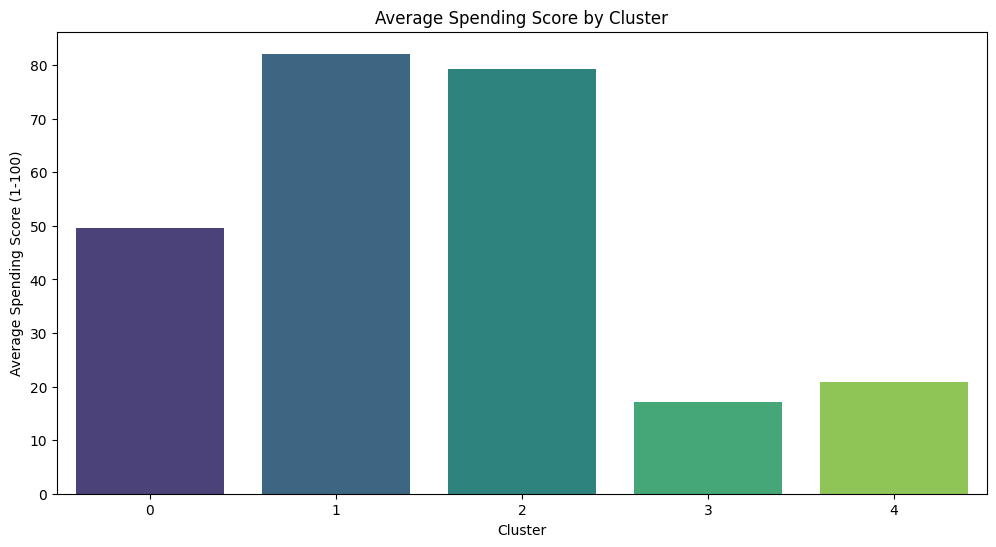

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster', y='Spending Mean', data=cluster_summary, palette='viridis')
plt.title('Average Spending Score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Spending Score (1-100)')
plt.xticks(rotation=0)
plt.show()

<ipython-input-15-ce90745cdf90>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Income Mean', data=cluster_summary, palette='viridis')


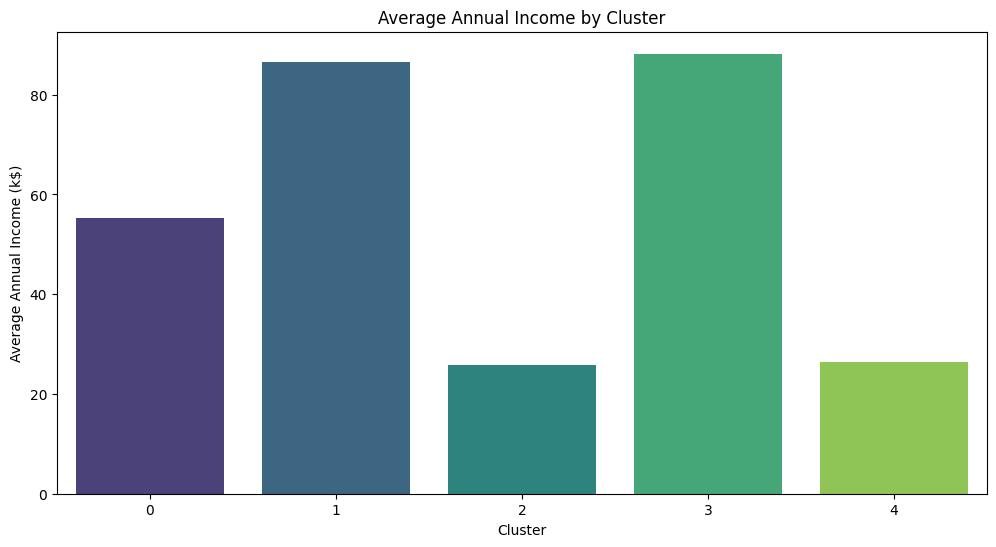

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster', y='Income Mean', data=cluster_summary, palette='viridis')
plt.title('Average Annual Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Annual Income (k$)')
plt.xticks(rotation=0)
plt.show()

<ipython-input-16-6f3137df086d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Age Mean', data=cluster_summary, palette='viridis')


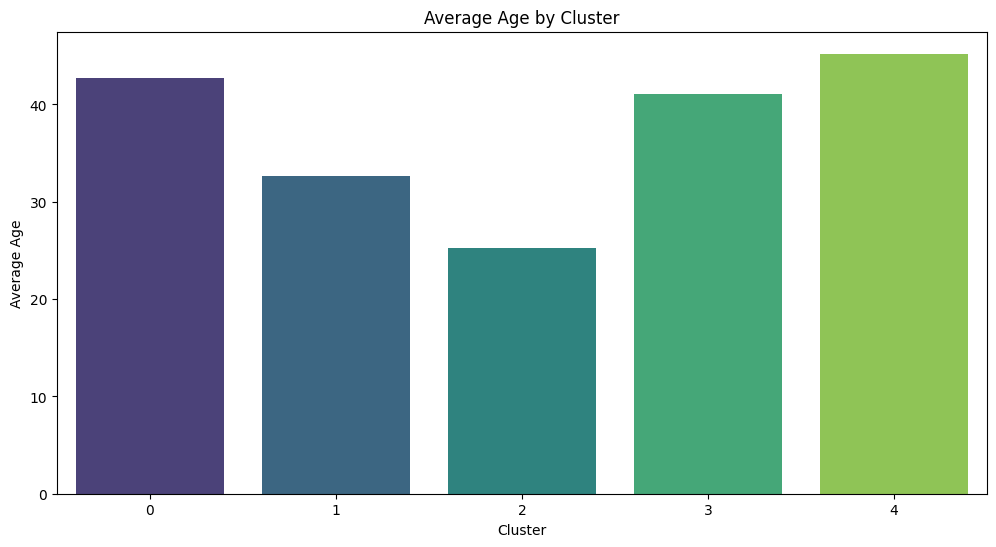

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster', y='Age Mean', data=cluster_summary, palette='viridis')
plt.title('Average Age by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Age')
plt.xticks(rotation=0)
plt.show()

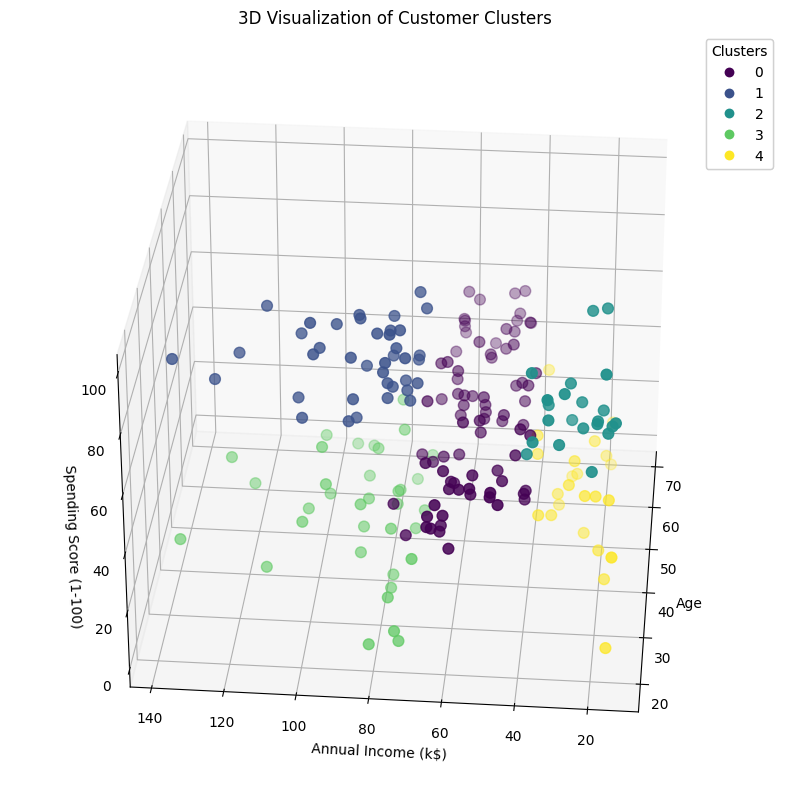

In [17]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'],
                     c=data['Cluster'], cmap='viridis', s=60)

ax.set_title('3D Visualization of Customer Clusters')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

ax.view_init(30, 185)

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()